# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [32]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data["Gender"] == 'Female']

male_height_mean = male_df['Height'].mean()
male_height_std = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_std = male_df['Weight'].std()
female_height_mean = female_df['Height'].mean()
female_height_std = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_std = female_df['Weight'].std()

print(
    f'Male height mean : {male_height_mean}\n'
    f'Male height std : {male_height_std}\n'
    f'Male weight mean : {male_weight_mean}\n'
    f'Male weight std : {male_weight_std}\n'
    f'female_height_mean : {female_height_mean}\n'
    f'female_height_std : {female_height_std}\n'
    f'female_weight_mean : {female_weight_mean}\n'
    f'female_weightt_std : {female_weight_std}\n'
    )

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male height mean : 69.02634590621741
Male height std : 2.863362228660647
Male weight mean : 187.0206206581932
Male weight std : 19.7811545167638
female_height_mean : 63.70877360342507
female_height_std : 2.6962840157650536
female_weight_mean : 135.86009300746835
female_weightt_std : 19.022467805319028



## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

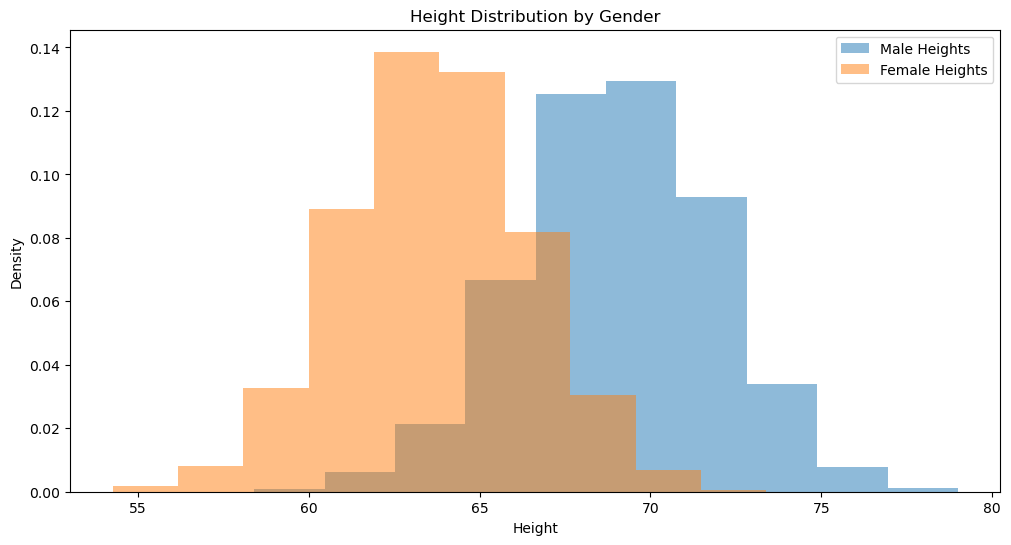

In [33]:
# Your code here

# Separate the data by gender
male_heights = data[data['Gender'] == 'Male']['Height']
female_heights = data[data['Gender'] == 'Female']['Height']

# Plot the histograms
plt.figure(figsize=(12, 6))

# Male heights histogram
plt.hist(male_heights, bins=10, density=True, alpha=0.5, label='Male Heights')

# Female heights histogram
plt.hist(female_heights, bins=10, density=True, alpha=0.5, label='Female Heights')

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Height Distribution by Gender')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?

# Males are on average taller than females, based off the peaks of the histogram
# Also there is a considerable overlap where male and female heights intersect

In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

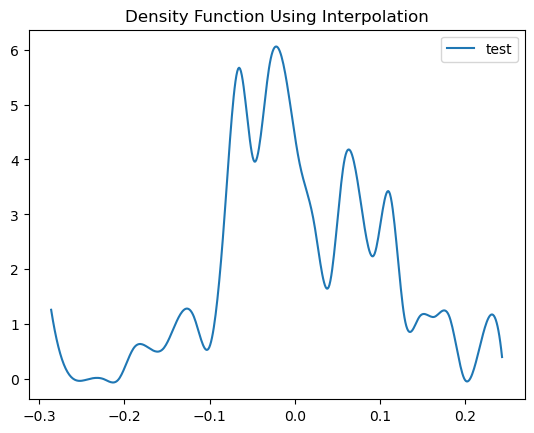

In [34]:
from scipy.interpolate import interp1d

def density(x, bins=30):
    # Compute the histogram
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    
    # Compute the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Create the interpolation function
    density_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    
    # Create x values for the smooth density plot
    x_smooth = np.linspace(min(x), max(x), 500)
    y_smooth = density_function(x_smooth)
    
    return x_smooth, y_smooth


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)

plt.plot(x,y, label = 'test')
plt.legend()
plt.title('Density Function Using Interpolation')
plt.show()

## Add overlapping density plots to the histograms plotted earlier

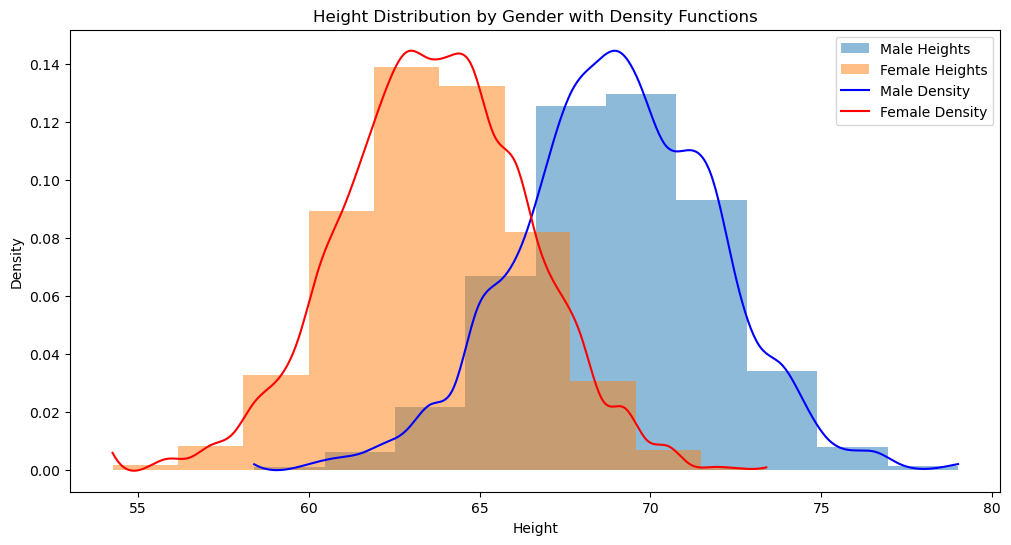

In [36]:
# Your code here 
# Compute the density functions for male and female heights
x_male, y_male = density(male_heights)
x_female, y_female = density(female_heights)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Male heights histogram
plt.hist(male_heights, bins=10, density=True, alpha=0.5, label='Male Heights')

# Female heights histogram
plt.hist(female_heights, bins=10, density=True, alpha=0.5, label='Female Heights')

# Overlay the density plots
plt.plot(x_male, y_male, label='Male Density', color='blue')
plt.plot(x_female, y_female, label='Female Density', color='red')

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Height Distribution by Gender with Density Functions')
plt.legend()

# Show the plot

## Repeat the above exercise for male and female weights

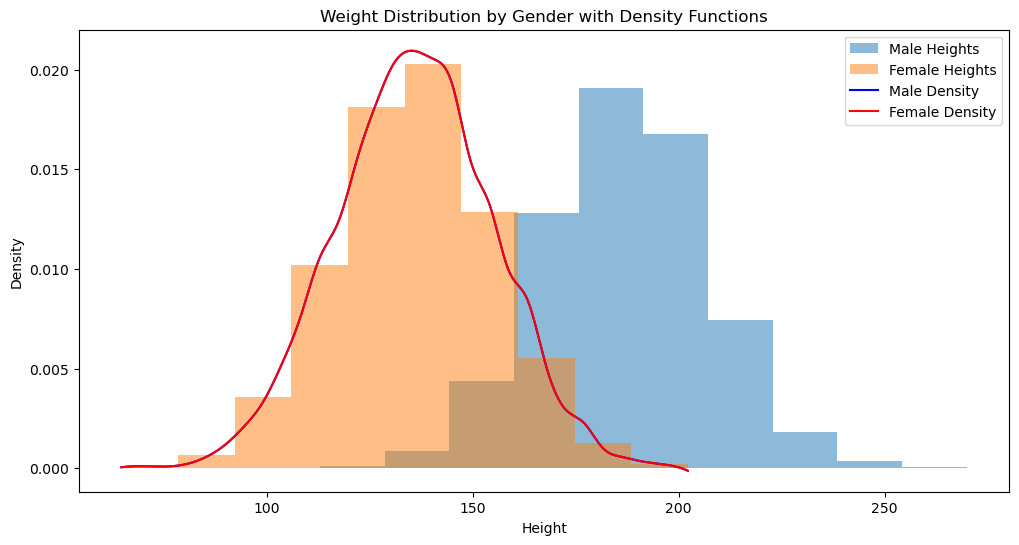

In [39]:
# Your code here 
male_weights = data[data['Gender'] == 'Male']['Weight']
female_weights = data[data['Gender'] == 'Female']['Weight']

# Compute the density functions for male and female weights
x_male, y_male = density(female_weights)
x_female, y_female = density(female_weights)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Male heights histogram
plt.hist(male_weights, bins=10, density=True, alpha=0.5, label='Male Heights')

# Female heights histogram
plt.hist(female_weights, bins=10, density=True, alpha=0.5, label='Female Heights')

# Overlay the density plots
plt.plot(x_male, y_male, label='Male Density', color='blue')
plt.plot(x_female, y_female, label='Female Density', color='red')

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Weight Distribution by Gender with Density Functions')
plt.legend()

# Show the plot
plt.show()

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

In [ ]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


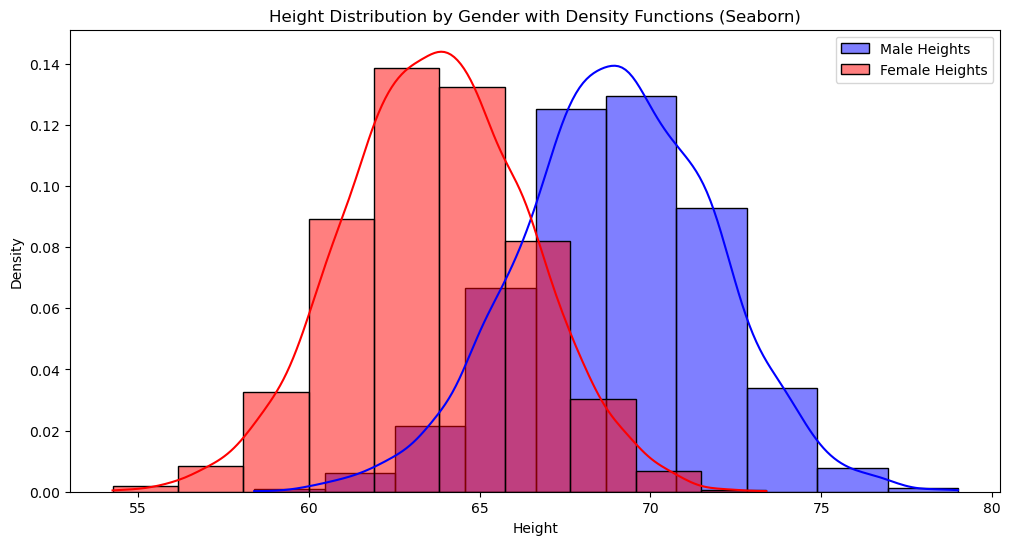

In [40]:
# Code for heights here
plt.figure(figsize=(12, 6))
sns.histplot(male_heights, bins=10, kde=True, color='blue', label='Male Heights', stat='density', alpha=0.5)
sns.histplot(female_heights, bins=10, kde=True, color='red', label='Female Heights', stat='density', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Height Distribution by Gender with Density Functions (Seaborn)')
plt.legend()
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


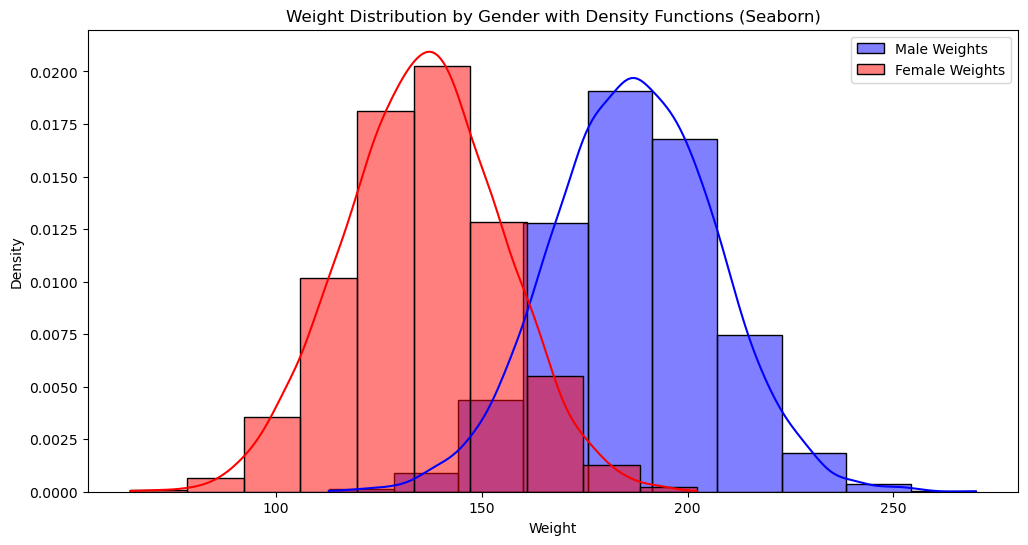

In [41]:
# Code for weights here
plt.figure(figsize=(12, 6))
sns.histplot(male_weights, bins=10, kde=True, color='blue', label='Male Weights', stat='density', alpha=0.5)
sns.histplot(female_weights, bins=10, kde=True, color='red', label='Female Weights', stat='density', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Weight Distribution by Gender with Density Functions (Seaborn)')
plt.legend()
plt.show()


In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.